In [1]:
import pandas as pd
import numpy as np
import os
from prog.tool import *
from prog.model import *
import warnings
warnings.simplefilter("ignore")

In [2]:
aluminum_division = 12
random_state = 99

In [3]:
root = r"C:\Users\tzuli\Documents\python\teco"

input_ = {
    "model_id": "20230807120000000",
}
model_id = input_["model_id"]

# 取得train位置
train_path = os.path.join(root, "data", "train")        
os.makedirs(train_path, exist_ok = True)
data_csv    = os.path.join(train_path, "train_data.csv")
output_json = os.path.join(train_path, "output.json")

# 取得model位置
model_path = os.path.join(root, "data", "train", model_id)
os.makedirs(model_path, exist_ok = True)

model_detail = os.path.join(model_path, "model")
os.makedirs(model_detail, exist_ok = True)

In [4]:
df_raw = pd.read_csv(r"C:\Users\tzuli\Documents\python\teco\data\train\train_data.csv")
print(df_raw.shape)
df_raw.head(3)

(172, 16)


,日期,工號,序號,平衡轉速,初始_L側角度,初始_L側不平衡量,初始_F側角度,初始_F側不平衡量,平衡_L側角度,平衡_L側配重,平衡_F側角度,平衡_F側配重,最終_L側角度,最終_L側不平衡量,最終_F側角度,最終_F側不平衡量
0,2023-06-07,FC236001,1,1000,277.0,12.5,145,24.9,277.0,12.0,145,24.0,312,1.4,56,2.2
1,2023-06-07,FC236001,2,1000,312.0,1.4,56,2.2,312.0,1.0,146,2.0,304,1.8,98,1.1
2,2023-06-07,FC234613,1,1000,298.0,155.0,267,64.3,298.0,150.0,267,60.0,9,23.0,197,3.6


In [5]:
# df_all = df_raw.groupby("工號").first().reset_index(drop = True)
df_all = df_raw.query("(初始_L側不平衡量 >= 4) & (初始_F側不平衡量 >= 4)").reset_index(drop = True)
df_l = df_all[["初始_L側角度", "初始_L側不平衡量"]]
df_f = df_all[["初始_F側角度", "初始_F側不平衡量"]]
df_l.head(3)

,初始_L側角度,初始_L側不平衡量
0,277.0,12.5
1,298.0,155.0
2,15.0,111.0


In [6]:
angle_init = np.linspace(0, 360, (aluminum_division + 1)).astype(int)
print(f"angle_init = {angle_init}")

df_l = calculate_angle_proportion(df_l, angle_init, aluminum_division, side = "L")            
df_f = calculate_angle_proportion(df_f, angle_init, aluminum_division, side = "F")

angle_init = [  0  30  60  90 120 150 180 210 240 270 300 330 360]


In [7]:
df_l.head()

,初始_L側角度,初始_L側不平衡量,angle_proportion,angle_0,angle_target,prop_37
0,277.0,12.5,0.233333,0.0,37,73
1,298.0,155.0,0.066667,0.0,37,37
2,15.0,111.0,0.500000,0.0,55,73
3,3.0,24.7,0.100000,0.0,37,73
4,16.0,137.0,0.466667,0.0,55,37


In [8]:
df_f.head()

,初始_F側角度,初始_F側不平衡量,angle_proportion,angle_0,angle_target,prop_37
0,145,24.9,0.166667,0.0,37,37
1,267,64.3,0.100000,0.0,37,37
2,165,30.2,0.500000,0.0,55,73
3,140,4.7,0.333333,0.0,55,37
4,10,76.7,0.333333,0.0,55,73


In [9]:
df_l = calculate_weight(df_l, side = "L")
df_f = calculate_weight(df_f, side = "F")

In [10]:
df_l.head()

,初始_L側角度,初始_L側不平衡量,angle_proportion,angle_0,angle_target,prop_37,3_raw,7_raw,5_raw,10_raw,...,7_amt,5_amt,10_amt,3_solution,7_solution,5_solution,10_solution,37_delta,5_delta,10_delta
0,277.0,12.5,0.233333,0.0,37,73,3.75,8.75,6.25,12.5,...,1,1,1,{'4': '1'},"{'4': '1', '5': '1'}",{'6': '1'},"{'5': '1', '7': '1'}",5.000000e-01,-0.25,-0.5
1,298.0,155.0,0.066667,0.0,37,37,46.50,108.50,77.50,155.0,...,1,1,2,"{'6': '1', '20': '2'}","{'16': '2', '20': '1'}","{'6': '1', '16': '1'}","{'7': '2', '16': '1', '20': '1'}",-1.000000e+00,0.50,1.0
2,15.0,111.0,0.500000,0.0,55,73,33.30,77.70,55.50,111.0,...,1,1,2,"{'6': '1', '7': '1', '20': '1'}","{'6': '1', '16': '1'}","{'16': '1', '20': '2'}","{'5': '1', '7': '1', '16': '1'}",1.421085e-14,0.50,1.0
3,3.0,24.7,0.100000,0.0,37,73,7.41,17.29,12.35,24.7,...,1,1,1,{'7': '1'},"{'4': '1', '6': '1', '7': '1'}","{'5': '1', '7': '1'}","{'5': '1', '20': '1'}",-7.000000e-01,-0.35,0.3
4,16.0,137.0,0.466667,0.0,55,37,41.10,95.90,68.50,137.0,...,1,1,2,"{'5': '1', '16': '1', '20': '1'}",{'20': '2'},"{'5': '1', '7': '1'}",{'20': '2'},7.105427e-15,-0.50,-1.0


In [11]:
df_f.head()

,初始_F側角度,初始_F側不平衡量,angle_proportion,angle_0,angle_target,prop_37,3_raw,7_raw,5_raw,10_raw,...,7_amt,5_amt,10_amt,3_solution,7_solution,5_solution,10_solution,37_delta,5_delta,10_delta
0,145,24.9,0.166667,0.0,37,37,7.47,17.43,12.45,24.9,...,1,1,1,{'7': '1'},"{'4': '1', '6': '1', '7': '1'}","{'5': '1', '7': '1'}","{'5': '1', '20': '1'}",-0.9,-0.45,0.1
1,267,64.3,0.100000,0.0,37,37,19.29,45.01,32.15,64.3,...,1,1,2,"{'5': '1', '7': '2'}","{'5': '1', '20': '2'}",{'16': '2'},{'4': '1'},-0.3,-0.15,-0.3
2,165,30.2,0.500000,0.0,55,73,9.06,21.14,15.10,30.2,...,1,1,1,"{'4': '1', '5': '1'}","{'5': '1', '16': '1'}","{'4': '2', '7': '1'}","{'7': '2', '16': '1'}",-0.2,-0.10,-0.2
3,140,4.7,0.333333,0.0,55,37,1.41,3.29,2.35,4.7,...,1,1,1,{},{'4': '1'},{},{'5': '1'},-0.7,-2.35,0.3
4,10,76.7,0.333333,0.0,55,73,23.01,53.69,38.35,76.7,...,1,1,2,"{'7': '1', '16': '1'}","{'7': '2', '20': '2'}","{'6': '1', '16': '2'}",{'5': '2'},0.3,-0.35,-0.7


In [12]:
df_l[["37_delta", "5_delta", "10_delta"]].describe()

,37_delta,5_delta,10_delta
count,9.300000e+01,93.000000,93.000000
mean,-4.623656e-02,-0.017742,-0.218280
std,6.991546e-01,0.547854,0.952907
min,-2.200000e+00,-2.250000,-4.500000
25%,-3.000000e-01,-0.300000,-0.400000
50%,7.105427e-15,-0.050000,0.000000
75%,3.000000e-01,0.400000,0.200000
max,1.600000e+00,1.450000,1.000000


In [13]:
df_f[["37_delta", "5_delta", "10_delta"]].describe()

,37_delta,5_delta,10_delta
count,9.300000e+01,9.300000e+01,93.000000
mean,-1.505376e-01,2.387576e-17,-0.075269
std,7.639462e-01,5.648201e-01,0.733315
min,-2.700000e+00,-2.500000e+00,-3.700000
25%,-3.000000e-01,-1.500000e-01,-0.200000
50%,8.881784e-16,0.000000e+00,0.000000
75%,2.000000e-01,3.000000e-01,0.100000
max,1.500000e+00,1.400000e+00,2.000000


In [14]:
df_l1 = encoding(df_l, side = "L")
df_f1 = encoding(df_f, side = "F")

In [15]:
X_train_l, X_test_l, y_train_l, y_test_l = split_data(df_l1, random_state)
X_train_f, X_test_f, y_train_f, y_test_f = split_data(df_f1, random_state)

In [16]:
X_train_l.head()

,angle_proportion,angle_0,3,7,37_delta,5,5_delta,10,10_delta
29,0.033333,0.0,0.301282,0.339744,1.421085e-14,0.141026,0.00,0.320513,0.0
50,0.333333,0.0,0.305132,0.693481,-1.000000e-01,0.499307,-0.05,0.110957,-0.1
61,0.133333,0.0,0.123028,0.170347,2.842171e-14,0.145110,-0.50,0.056782,-1.0
36,0.366667,0.0,0.331126,0.728477,9.000000e-01,0.529801,0.45,0.993377,-0.1
88,0.166667,0.0,0.307692,0.692308,4.440892e-16,0.461538,-0.50,1.000000,0.0


In [17]:
X_train_f.head()

,angle_proportion,angle_0,3,7,37_delta,5,5_delta,10,10_delta
57,0.133333,0.0,0.294118,0.000000,-1.600000e+00,0.502451,0.20,0.159314,0.4
65,0.266667,0.0,0.292553,0.691489,-6.000000e-01,0.505319,0.20,1.010638,0.4
56,0.233333,0.0,0.396040,0.693069,9.000000e-01,0.495050,-0.05,0.990099,-0.1
61,0.133333,0.0,0.298913,0.092391,2.131628e-14,0.195652,0.00,0.043478,0.0
30,0.133333,0.0,0.303030,0.707071,2.000000e-01,0.505051,0.10,1.010101,0.2


In [18]:
models_l = modeling(X_train_l, y_train_l, random_state)
scores_l, pred_trains_l, pred_tests_l = calculate_score(models_l, X_train_l, X_test_l, y_train_l, y_test_l, scoring = "weighted", cv_flag = 1)

models_f = modeling(X_train_f, y_train_f, random_state)
scores_f, pred_trains_f, pred_tests_f = calculate_score(models_f, X_train_f, X_test_f, y_train_f, y_test_f, scoring = "weighted", cv_flag = 1)

In [19]:
scores_l

accuracy       precision      recall          f1       accuracy
                 train  test     train test  train  test train  test       cv
Random Forest      1.0  0.95       1.0  0.9    1.0  0.95   1.0  0.92     0.97

In [20]:
scores_f

accuracy      precision      recall         f1      accuracy
                 train test     train test  train test train test       cv
Random Forest      1.0  1.0       1.0  1.0    1.0  1.0   1.0  1.0     0.97

In [21]:
scores_l.to_csv(os.path.join(model_path, "L_score.csv"))
scores_f.to_csv(os.path.join(model_path, "F_score.csv"))

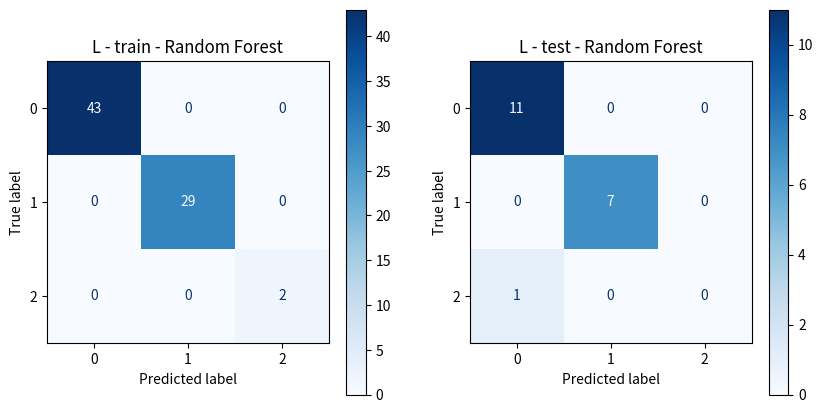

Classification Report of L Test:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00         7
           2       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.64      0.67      0.65        19
weighted avg       0.90      0.95      0.92        19

----------------------------------------------------------------------------------------------------


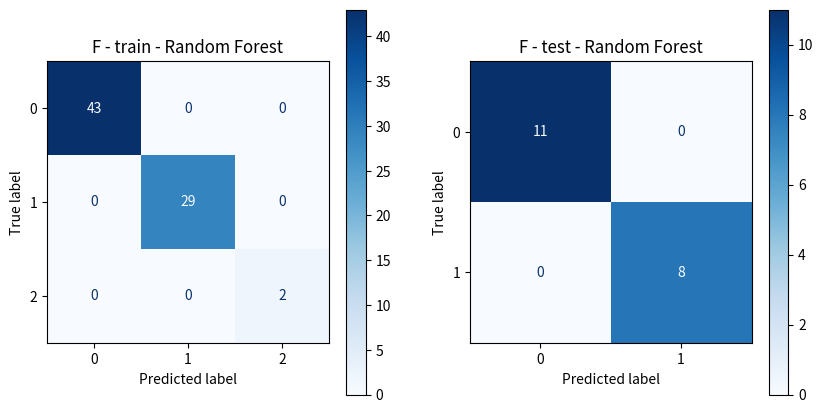

Classification Report of F Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

----------------------------------------------------------------------------------------------------


In [22]:
pred_plot(y_train_l, y_test_l, pred_trains_l, pred_tests_l, scores_l, model_path, side = "L", flag = True)
pred_plot(y_train_f, y_test_f, pred_trains_f, pred_tests_f, scores_f, model_path, side = "F", flag = True)